<a href="https://colab.research.google.com/github/KukuhIksanMusyahada/KukuhIksanMusyahada/blob/main/numerical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EKSPLICIT METHOD

#FTCS METHOD For flow over Flate plat 

Created by Kukuh Iksan Musyahada NIM 13618045

In [ ]:
import numpy as np

#import data
u0=40 
h=0.04
vi=0.000217

#step_length
dt=0.03
grid=10
dx=h/(grid)


#calculate_stabilitas
stabil=vi*dt/(dx**2)
if stabil>=0.5:
  print("the calculation will result in divergent manner!")

#initialize
N=np.zeros(grid+1)
N_before=np.zeros(grid+1)
err=np.zeros(grid+1)


#initialcondition
for step in range(grid+1):
  N[0]=u0
N_before=N
N_compute=np.matrix([N_before,N])

#calculation
iter=1
while iter>0: #time_march
  for step in range(1,grid):
    N_compute[1,step]=N_compute[0,step]+stabil*(N_compute[0,step+1]+N_compute[0,step-1]-2*N_compute[0,step]) #space_march
  for step in range (grid):
    err[step]=np.absolute(N_compute[1,step]-N_compute[0,step]) #Calculate Error for each grid 
  eror=np.sum(err) #calculate total error
  N_compute[0,:]=N_compute[1,:] #reevaluete the calculation matrix
  if eror<0.002: #limit error allowed
    break
print(N_compute[1,:]) #printing result
print(eror)







[[40.         35.99769772 31.99562079 27.99397254 23.9929143  19.99254965
  15.9929143  11.99397254  7.99562079  3.99769772  0.        ]]
0.0019511958018063602


#DUFORT-FORKELL for flow over flat plat

In [1]:
import numpy as np

#import data
u0=40 
h=0.04
vi=0.000217

#step_length
dt=0.03
grid=10
dx=h/(grid)


#calculate_stabilitas
stabil=2*vi*dt/(dx**2)


#initialize
N=np.zeros(grid+1)
N_before=np.zeros(grid+1)
N_after=np.zeros(grid+1)
err=np.zeros(grid+1)

#initialcondition
for step in range(grid+1):
  N[0]=u0
N_before=N
N_after=N
N_compute=np.matrix([N_before,N,N_after])


iter=1
while iter>0: #time_march
  for step in range(1,grid):
    N_compute[2,step]=((1-stabil)*N_compute[0,step]+stabil*(N_compute[1,step-1]+N_compute[1,step+1]))/(1+stabil) #space_march
  for step in range(1,grid):
    err[step]=np.absolute(N_compute[2,step]-N_compute[1,step]) #Calculate Error for each grid 
  eror=np.sum(err) #calculate total error
  iter=iter+1
  N_compute[2,:]=np.round(N_compute[2,:],6) #reevaluete the calculation matrix
  N_compute[0,:]=N_compute[1,:] #reevaluete the calculation matrix
  N_compute[1,:]=N_compute[2,:] #reevaluete the calculation matrix
  if eror<0.002: #limit error allowed
    break
print(np.round(eror,6))
print(N_compute[2,:])



0.00195
[[40.       35.997585 31.995588 27.993677 23.992862 19.992185 15.992862
  11.993677  7.995588  3.997585  0.      ]]


Hyperbolic Method

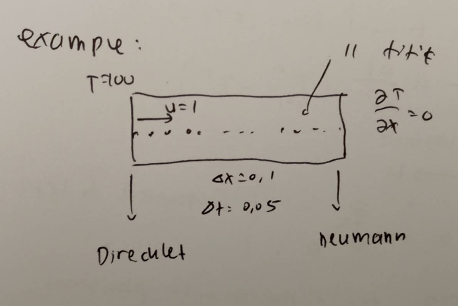![image.png]()

#Lax Method

In [106]:
import numpy as np

#import data
T0=100 
h=1
u=1

#step_length
dt=0.05
grid=10
dx=h/(grid)


#calculate_stabilitas
stabil=0.5*u*dt/(dx)

#initialize
N=np.zeros(grid+1)
N_before=np.zeros(grid+1)
err=np.zeros(grid+1)

#initialcondition
for step in range(grid+1):
  N[0]=T0
N_before=N
N_compute=np.matrix([N_before,N])

#calculation
iter=0
while iter>-1: #time_march
  for step in range (grid):
    N_compute[1,step]=(0.5*(N_compute[0,step-1]+N_compute[0,step+1]))-(stabil*(N_compute[0,step+1]-N_compute[0,step-1])) #spacemarch
  for step in range (grid+1):
    err[step]=np.absolute(N_compute[1,step]-N_compute[0,step]) #Calculate Error for each grid 
  if iter != 0: #make all value of err in grid 1 is 0 except initial property
    err[0]=0
  err[10]=err[9]
  eror=np.sum(err) #calculate total error 
  N_compute[1,0]=0
  N_compute[1,10]=N_compute[1,9]
  N_compute[0,:]=N_compute[1,:]
  iter=iter+1 #calculate how many iteration
  if eror<8.3e-6:
    break

print(eror,iter) #printing eror and number of iteration 
print(N_compute[1,:]) #printing result



8.27166366318472e-06 95
[[0.00000000e+00 4.68232318e-08 6.84373856e-08 3.74382773e-07
  3.61730211e-07 1.44983286e-06 1.28892727e-06 3.88565938e-06
  3.48730494e-06 6.44319165e-06 6.44319165e-06]]
